In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('/content/Algerian_forest_fires_cleaned (1).csv')

In [4]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [52]:
data.isnull().sum()  #checking the null values

month               0
Temperature         0
RH                  0
Rain                0
FFMC                0
DMC                 0
ISI                 0
FWI                 0
Classes_not fire    0
dtype: int64

In [7]:
data.duplicated().sum()  #checking the duplicates

0

In [8]:
data['Classes'].unique() #uniques values including in the 'class' column

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [9]:
# Strip leading and trailing whitespace
data['Classes'] = data['Classes'].str.strip()

In [10]:
data['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [11]:
# Perform one-hot encoding using pandas get_dummies with drop_first=True
data = pd.get_dummies(data, columns=['Classes'], drop_first=True)

data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_not fire
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,True
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,True
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,True
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,True
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,True


In [12]:
data['Classes_not fire'] = data['Classes_not fire'].astype(int)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_not fire
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   day               243 non-null    int64  
 1   month             243 non-null    int64  
 2   year              243 non-null    int64  
 3   Temperature       243 non-null    int64  
 4   RH                243 non-null    int64  
 5   Ws                243 non-null    int64  
 6   Rain              243 non-null    float64
 7   FFMC              243 non-null    float64
 8   DMC               243 non-null    float64
 9   DC                243 non-null    float64
 10  ISI               243 non-null    float64
 11  BUI               243 non-null    float64
 12  FWI               243 non-null    float64
 13  Region            243 non-null    int64  
 14  Classes_not fire  243 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.6 KB


VISUALIZATION

<ipython-input-15-0aa2149c02a3>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


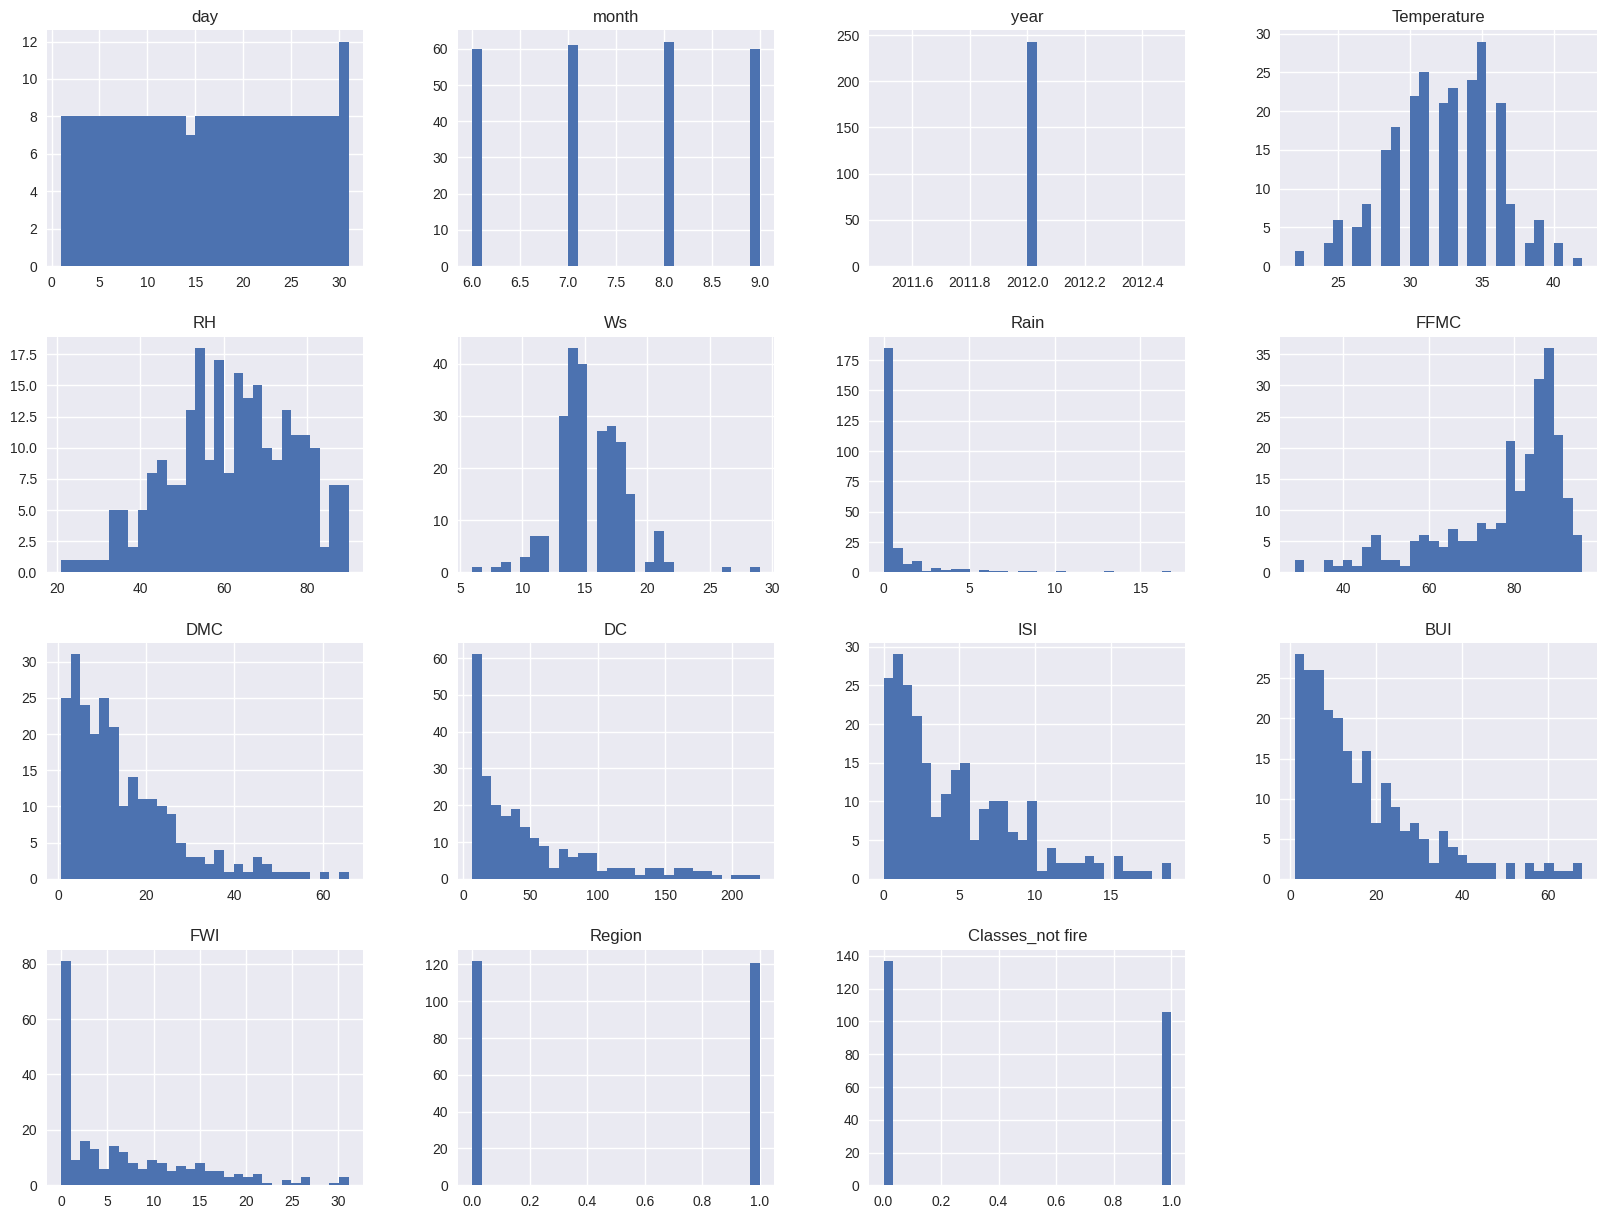

In [15]:
# Univariate Analysis of data
plt.style.use('seaborn')
data.hist(bins=30, figsize=(20,15))
plt.show()

In [46]:
#plotting graph between temperature and fwi showing how fwi varies as tempearture increases

import plotly.express as px
fig = px.scatter(data, x='Temperature', y='FWI', log_x=True,
                 size_max=60, title="Temp v/s FWI")
fig.show()


The maximum fwi was 31.1 when temperature rises upto 34 degree celcius

In [51]:
fig = px.scatter(data, x='Classes_not fire', y='FWI',

                 title="Scatter Plot of Class vs FWI ")

# Show the plot
fig.show()

Date and Weather Observations¶

Date: Recorded in the format DD/MM/YYYY, covering the months from June to September in the year 2012.

Temp: Noon temperature (maximum temperature) in Celsius degrees, ranging from 22 to 42.

RH: Relative Humidity, measured in percentage (%), with a range from 21 to 90.

Ws: Wind speed, recorded in kilometers per hour (km/h), varying from 6 to 29.

Rain: Total precipitation in a day, measured in millimeters (mm), with values from 0 to 16.8.

FWI Components

Fine Fuel Moisture Code (FFMC): An index from the FWI system, ranging from 28.6 to 92.5.

Duff Moisture Code (DMC): An index from the FWI system, with values between 1.1 to 65.9.

Drought Code (DC): An index from the FWI system, ranging from 7 to 220.4.

Initial Spread Index (ISI): An index from the FWI system, with values from 0 to 18.5.

Buildup Index (BUI): An index from the FWI system, ranging from 1.1 to 68.

Fire Weather Index (FWI): An index, with a range from 0 to 31.1

[0.08675797 0.18304427 0.         0.21311406 0.22975883 0.05939471
 0.27964032 1.19287491 0.92802554 0.69416617 1.58686577 0.90900134
 0.02022875 0.58831317]


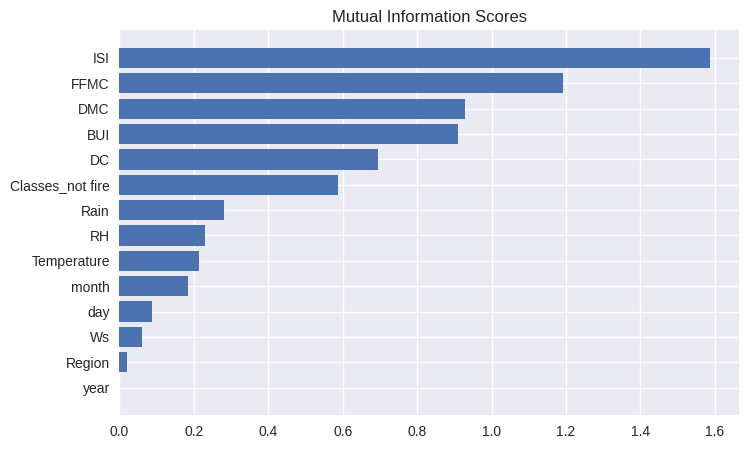

In [17]:
# Assuming X and Y are defined as per code
# Replace it with actual data
from sklearn.feature_selection import mutual_info_regression

X = data.drop(labels=['FWI'], axis=1)
Y = data['FWI']

# Calculate mutual information scores between features in X and the target variable Y
mi_scores = mutual_info_regression(X, Y)

def plot_mi_scores(scores):
    scores = pd.Series(scores, index=X.columns)
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.show()

# Print and plot the mutual information scores
print(mi_scores)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [18]:
data.drop(['day','Ws','year','Region'],axis=1,inplace=True)

In [21]:
corr = X.corr()
corr

,month,Temperature,RH,Rain,FFMC,DMC,DC,ISI,BUI,Classes_not fire
month,1.000000,-0.056781,-0.041252,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,-0.024004
Temperature,-0.056781,1.000000,-0.651400,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,-0.516015
RH,-0.041252,-0.651400,1.000000,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,0.432161
Rain,0.034822,-0.326492,0.222356,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,0.379097
FFMC,0.017030,0.676568,-0.644873,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,-0.769492
DMC,0.067943,0.485687,-0.408519,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,-0.585658
DC,0.126511,0.376284,-0.226941,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,-0.511123
ISI,0.065608,0.603871,-0.686667,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,-0.735197
BUI,0.085073,0.459789,-0.353841,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,-0.586639
Classes_not fire,-0.024004,-0.516015,0.432161,0.379097,-0.769492,-0.585658,-0.511123,-0.735197,-0.586639,1.000000


plotting heatmap to check the multicollinearity

<Axes: >

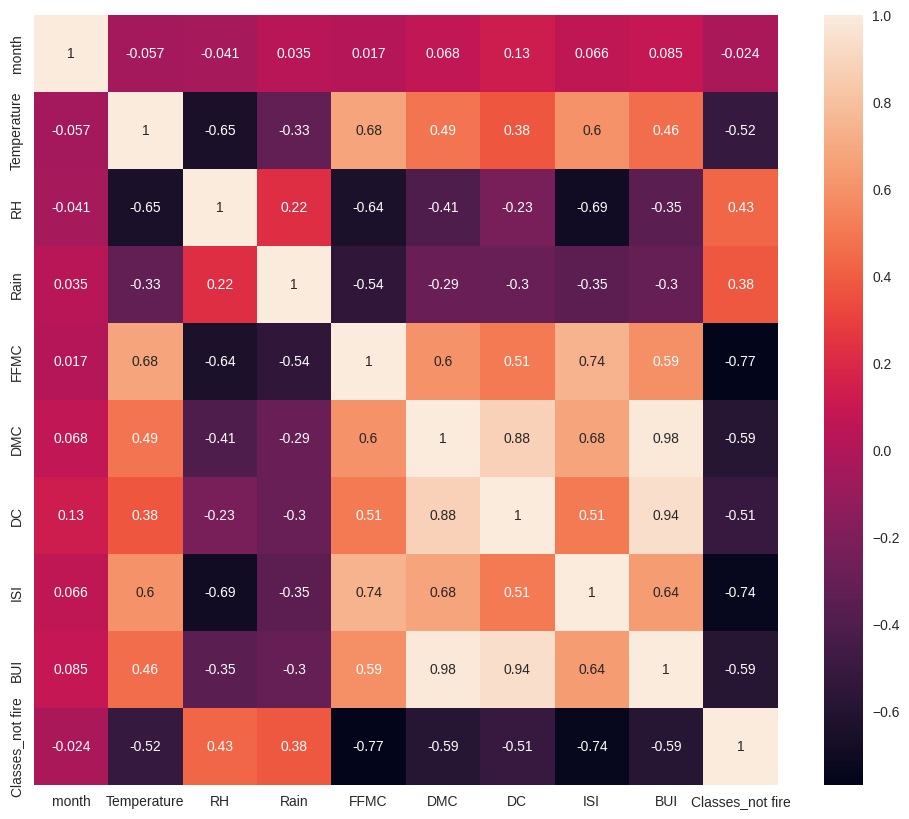

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)

DROPPING OUT 'BUI' AND 'DC' TO REMOVE MULTICOLLINEARITY

In [24]:
#dropping bui and dc as they both are showing multicollinearity
data.drop(['BUI','DC'],axis=1,inplace=True)

SPLITTING THE DATA INTO TRAIN AND TEST

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


In [26]:
X_train.shape,X_test.shape


((182, 10), (61, 10))

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

BOX PLOT BEFORE AND AFTER SCALING

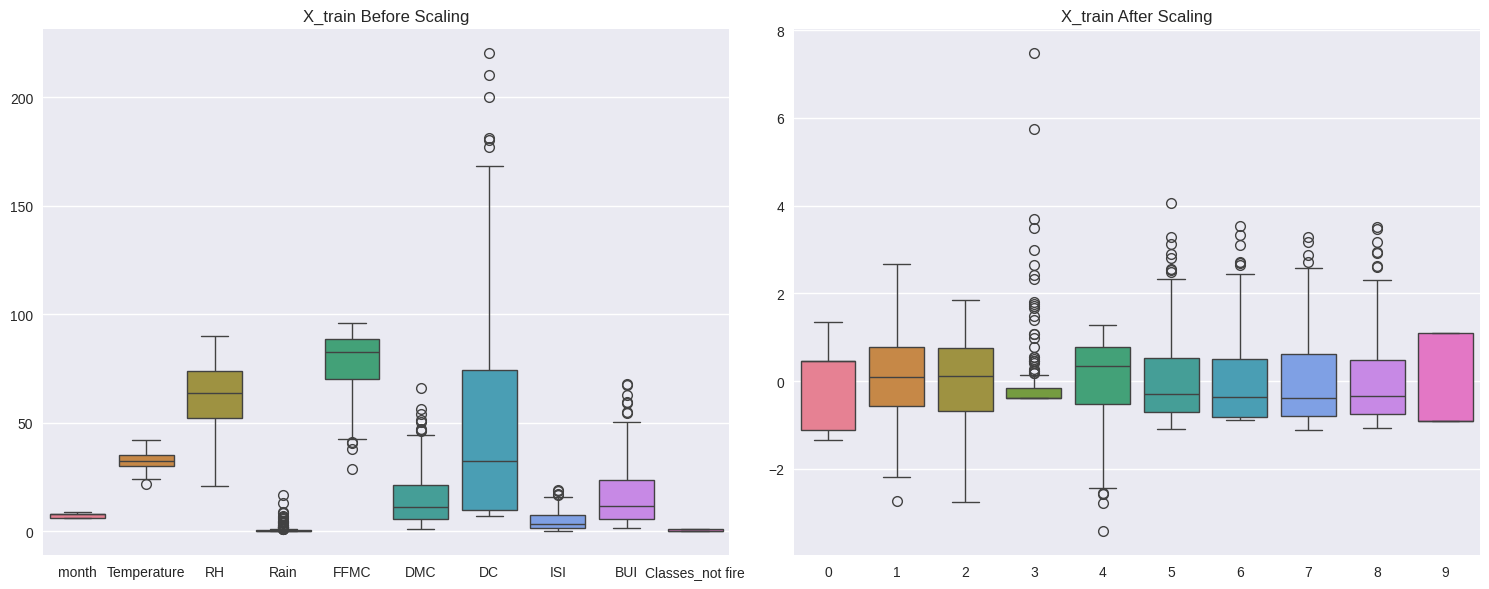

In [28]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title("X_train Before Scaling")

plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train After Scaling")

plt.tight_layout()
plt.show()


LINEAR REGRESSION

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(X_train_scaled,Y_train)
Y_pred=lr.predict(X_test_scaled)
lr_mae=mean_absolute_error(Y_test,Y_pred)
lr_mse=mean_squared_error(Y_test,Y_pred)
lr_score=r2_score(Y_test,Y_pred)
print("Mean absolute error: ", lr_mae)
print("Mean squared error: ", lr_mse)
print("R2 Score: ", lr_score)

Mean absolute error:  0.4691772346902906
Mean squared error:  0.48472841571102154
R2 Score:  0.9890482948392327


CROSS VALIDATION

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Initialize the Linear Regression model
lr = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(lr, X_train_scaled, Y_train, cv=5, scoring='r2')
print("Cross-Validation R2 Scores: ", cv_scores)
print("Mean Cross-Validation R2 Score: ", cv_scores.mean())



Cross-Validation R2 Scores:  [0.98815307 0.98321789 0.85366133 0.97822277 0.97089626]
Mean Cross-Validation R2 Score:  0.9548302632594583


LASSO

In [30]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,Y_train)
Y_pred=lasso.predict(X_test_scaled)
lasso_mae=mean_absolute_error(Y_test,Y_pred)
lasso_r2score=r2_score(Y_test,Y_pred)
lasso_mse=mean_squared_error(Y_test,Y_pred)
print("Mean absolute error: ", lasso_mae)
print("Mean squared error: ", lasso_mse)
print("R2 Score: ", lasso_r2score)

Mean absolute error:  1.0816320494819094
Mean squared error:  2.0000575094204627
R2 Score:  0.954811726653942


RIDGE

In [31]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,Y_train)
y_pred=ridge.predict(X_test_scaled)
ridge_mae=mean_absolute_error(Y_test,Y_pred)
ridge_mse=mean_squared_error(Y_test,Y_pred)
ridge_score=r2_score(Y_test,Y_pred)
print("Mean absolute error: ", ridge_mae)
print("Mean squared error: ", ridge_mse)
print("R2 Score: ", ridge_score)

Mean absolute error:  1.0816320494819094
Mean squared error:  2.0000575094204627
R2 Score:  0.954811726653942


ELASTIC NET

In [32]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,Y_train)
Y_pred=elastic.predict(X_test_scaled)
elastic_mae=mean_absolute_error(Y_test,Y_pred)
elastic_R2score=r2_score(Y_test,Y_pred)
elastic_mse=mean_squared_error(Y_test,Y_pred)
print("Mean absolute error: ", elastic_mae)
print("Mean squared error: ", elastic_mse)
print("R2 Score: ", elastic_R2score)

Mean absolute error:  1.6830978419400622
Mean squared error:  4.396333852456856
R2 Score:  0.900671488239899


DECISION TREE REGRESSOR

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

reg = DecisionTreeRegressor()
reg.fit(X_train_scaled, Y_train)
Y_pred = reg.predict(X_test_scaled)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Squared Error: 2.5068852459016386
R-squared: 0.9433607207765602


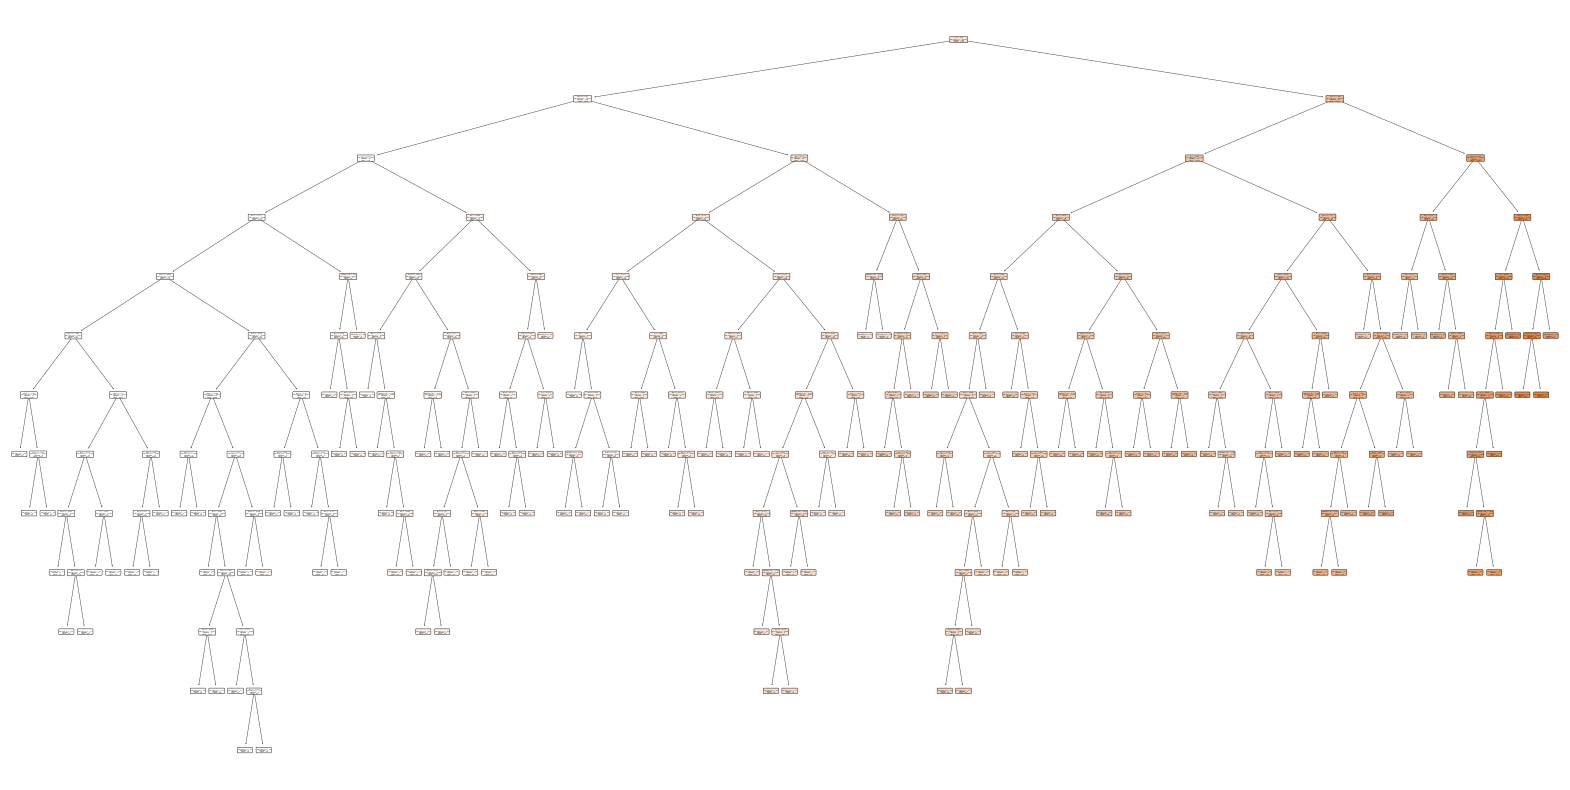

In [40]:
plt.figure(figsize=(20, 10))
plot_tree(reg, filled=True, feature_names=X_train.columns, rounded=True)
plt.show()

Among all the models, linear regression shows the highest accuracy of approx 98.9%

Pickle creation

In [54]:
import pickle
#since linear and ridge had the highest R2 score we will be using the model for predictions
pickle.dump(lr, open('linear_model.pkl', 'wb'))
pickle.dump(ridge, open('ridge_model.pkl', 'wb'))

prediction using pkl files

In [55]:
#using linear model
# Load the model from the file
with open('linear_model.pkl', 'rb') as file:
    model = pickle.load(file)

#loading the scaled data
sample_data = X_test_scaled

# Make predictions
predictions = model.predict(sample_data)

#check the r2 score with the pkl file feeding and predictions
mae=mean_absolute_error(Y_test,predictions)
score=r2_score(predictions,Y_pred)
print("Mean absolute error (pkl)", mae)
print("R2 Score(pkl)", score)

Mean absolute error (pkl) 0.4691772346902906
R2 Score(pkl) 0.9274176166783794


In [56]:
#using ridge model
# Load the model from the file
with open('ridge_model.pkl', 'rb') as file:
    model = pickle.load(file)

#loading the scaled data
sample_data = X_test_scaled

# Make predictions
predictions = model.predict(sample_data)

#check the r2 score with the pkl file feeding and predictions
mae=mean_absolute_error(Y_test,predictions)
score=r2_score(predictions,Y_pred)
print("Mean absolute error (pkl)", mae)
print("R2 Score(pkl)", score)

Mean absolute error (pkl) 0.5011726297756991
R2 Score(pkl) 0.9191948077921045
